# Exploratory Data Analysis


## Importing libraries

In [86]:
import pandas as pd
import numpy as np
from astropy.table.column import FORMATTER
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from src.preprocessing import *


## Loading data

In [87]:
df = pd.read_csv('../data/processed/num_imputed_df.csv')
y = pd.read_csv('../data/raw/application_train.csv')['TARGET']

# adjust the length of y to make sure that both variables have the same number of rows
y = y.loc[df.index]

desc = forma(df)
desc

'307507 filas y 87 columnas'

In [88]:
df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,6.0,7.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,6.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Principal Component Analysis (PCA). Dimensionality reductions

### Creation of training and test sets

In [89]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

### Standardizing data
Standardizing the data is crucial before applying PCA. If the data is in different scales, it can dominate the variance. By standardizing the data we make sure that all variables are in the same scale (mean of zero and standard deviation of one), allowing PCA to have an accurate representation of the data before obtaining the principal components.

In [90]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### PCA
Obtain the number of components that explain the 95% of the variance 

In [91]:
pca = PCA(0.95)
pca.fit(x_train)
pca.n_components_

70

To make sure that we have the right number of components, plot the cumulative explained variance vs. the cumulative explained variance by components

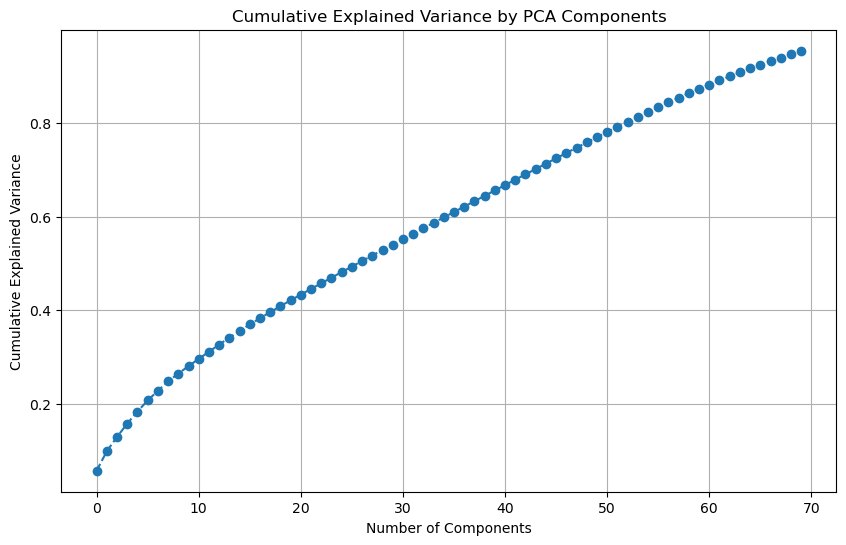

In [92]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [93]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# Create df for PCA components
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
df_train_pca = pd.DataFrame(x_train, columns=pca_columns)
df_test_pca = pd.DataFrame(x_test, columns=pca_columns)

print(df_train_pca.head())
print(df_test_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.393879 -0.800066 -0.038506  1.155329 -0.722676 -0.075906  1.189398   
1 -0.173427  1.826099  1.034000  0.293528 -0.755822 -1.097151  1.752485   
2  1.785422 -0.839829  0.686531 -0.398778 -1.424537  1.702615 -2.390922   
3  1.231313  1.828627  0.238730  0.765041 -0.527766  1.744928  2.471116   
4  3.799825  8.305147  0.260432 -0.337084 -0.575622 -0.728044  4.103387   

        PC8       PC9      PC10  ...      PC61      PC62      PC63      PC64  \
0 -1.069151  1.247516  0.134900  ... -1.070045  1.136908  0.055429  1.489631   
1 -0.043467  1.042990  0.755397  ... -0.721220 -0.829733 -1.017672  1.036305   
2 -0.477675 -0.067476  0.535283  ...  0.006113 -1.873261 -0.177621 -0.269428   
3 -0.181741  0.317593 -0.062718  ... -1.372874  0.065748  0.456852 -0.646036   
4 -0.778734 -2.579151 -1.560990  ...  0.857452  0.466273 -2.070308 -1.082178   

       PC65      PC66      PC67      PC68      PC69      PC70  
0 -0

Add the classes

In [94]:
df_train_pca = pd.concat([df_train_pca, y], axis = 1)
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,TARGET
0,-0.393879,-0.800066,-0.038506,1.155329,-0.722676,-0.075906,1.189398,-1.069151,1.247516,0.134900,...,1.136908,0.055429,1.489631,-0.008553,0.406856,-1.274467,0.677240,0.558821,-0.393784,1
1,-0.173427,1.826099,1.034000,0.293528,-0.755822,-1.097151,1.752485,-0.043467,1.042990,0.755397,...,-0.829733,-1.017672,1.036305,-0.401637,-0.256862,0.684897,-0.374696,-1.905148,-0.343968,0
2,1.785422,-0.839829,0.686531,-0.398778,-1.424537,1.702615,-2.390922,-0.477675,-0.067476,0.535283,...,-1.873261,-0.177621,-0.269428,-0.025830,0.274058,0.376143,-0.367482,1.674945,0.220046,0
3,1.231313,1.828627,0.238730,0.765041,-0.527766,1.744928,2.471116,-0.181741,0.317593,-0.062718,...,0.065748,0.456852,-0.646036,-0.298770,-0.327984,2.430739,0.320040,0.384447,-0.232632,0
4,3.799825,8.305147,0.260432,-0.337084,-0.575622,-0.728044,4.103387,-0.778734,-2.579151,-1.560990,...,0.466273,-2.070308,-1.082178,-0.831284,0.204829,-2.201422,-0.521202,1.084233,0.998760,0


In [95]:
df_test_pca = pd.concat([df_test_pca, y], axis = 1)
df_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,TARGET
0,1.509498,-1.719290,0.003453,-0.636578,-2.594078,0.677496,-1.299096,2.198104,0.370738,-0.412313,...,-0.742110,-1.029231,0.004932,0.857053,0.094651,-0.646217,0.678589,0.158124,0.406005,1
1,0.155823,-0.744920,-0.845033,-0.801571,-1.306886,-0.464982,0.771834,0.764642,0.228245,-0.098728,...,-0.952454,0.334291,0.712827,-0.807610,-0.146016,1.514483,-0.551981,0.256884,0.021042,0
2,3.382480,3.485476,-2.296500,1.314718,0.586362,1.684540,1.711204,0.107301,-1.360119,-2.396130,...,-1.046935,-0.465599,1.964935,-0.365330,0.131101,0.623349,-0.465410,0.791984,-1.686392,0
3,2.453382,3.758423,-1.633940,0.863384,-1.067821,-0.946433,-1.459300,-2.299239,-1.436166,0.405595,...,0.040622,0.557779,-0.065330,1.292068,0.249735,-0.631980,1.021684,1.174373,1.303321,0
4,-0.252257,-0.251801,0.033348,-1.236010,-1.313491,-1.345881,-0.128124,0.121636,0.016843,1.176396,...,1.025091,-0.573847,0.292862,-0.082223,0.147764,-0.241605,0.713737,0.129591,-0.238474,0
